 #           Regression analysis on medicare spends !

![](Medicare_insurance.png)

# Why Medicare?

    Today, Medicare plays a key role in providing health and financial security to 60 million older people and younger people with disabilities. The program helps to pay for many medical care services, including hospitalizations, physician visits, prescription drugs, preventive services, skilled nursing facility and home health care, and hospice care.Regression analysis refers to the method of studying the relationship between independent variable and dependent variable.

# What is Linear Regression ?

   Regression models are supervised learning models that are generally used when the value to be predicted is of discrete or quantitative nature.
    The idea behind Linear Regression model is to obtain a line that best fits the data. By best fit, what is meant is that the total distance of all points from our regression line should be minimal. Often this distance of the points from our regression line is referred to as an Error though it is technically not one. We know that the straight line equation is of the form:
Straight Line Equation 
    (y=mx+c)
    where y is the Dependent Variable, x is the Independent Variable, m is the Slope of the line and c is the Coefficient (or the y-intercept). Herein, y is regarded as the dependent variable as its value depends on the values of the independent variable and the other parameters.


# About Dataset

Dataset :healthcare_census.csv (163,065 rows, 19 columns)
Link :https://data.world/bongani/healthcare

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Read the Dataset
df=pd.read_csv('healthcare_census.csv')

In [3]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Summary Level,State,State FIPS,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,"32,963.07","5,777.24","4,763.73",40,AL,1,"1,73,849","58,849","1,88,498","48,144"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,20017,ALASKA REGIONAL HOSPITAL,2801 DEBARR ROAD,ANCHORAGE,AK,99508,AK - Anchorage,23,"34,805.13","8,401.95","6,413.78",40,AK,2,"26,917","12,275","25,692","8,152"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30002,BANNER GOOD SAMARITAN MEDICAL CENTER,1111 EAST MCDOWELL ROAD,PHOENIX,AZ,85006,AZ - Phoenix,11,"34,803.81","7,768.90","6,951.45",40,AZ,4,"2,33,098","92,136","2,45,929","72,752"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40004,WASHINGTON REGIONAL MED CTR AT NORTH HILLS,3215 N NORTH HILLS BLVD,FAYETTEVILLE,AR,72703,AR - Springdale,39,"30,470.56","5,811.56","4,372.61",40,AR,5,"1,01,489","40,199","1,05,642","34,898"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50006,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,CA - Redding,48,"44,664.45","8,227.14","6,936.52",40,CA,6,"14,58,114","5,15,578","15,11,793","4,03,457"


In [4]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'Summary Level', 'State', 'State FIPS',
       'Insured Males 18-25', 'Noninsured Males 18-25',
       'Females 18-25 with Insurance', 'Females 18-25 without insurance'],
      dtype='object')

# rename columns name

In [5]:
col={'DRG Definition':'DRG_Definition', 'Provider Id':'Provider_Id', 'Provider Name':'Provider_Name',
    'Provider Street Address':'Provider_Street_Address', 'Provider City':'Provider_City',
    'Provider State':'Provider_State','Provider Zip Code':'Provider_Zip_Code',
    'Hospital Referral Region Description':'Hospital_Referral_Region_Description','Total Discharges':'Total_Discharges', 'Average Covered Charges':'Average_Covered_Charges',
     'Average Total Payments':'Average_Total_Payments','Average Medicare Payments':'Average_Medicare_Payments',
     'Summary Level':'Summary_Level', 'State':'State', 'State FIPS':'State_FIPS',
       'Insured Males 18-25':'Insured_Males_18to25', 'Noninsured Males 18-25':'Noninsured_Males_18to25',
       'Females 18-25 with Insurance':'Females_18to25_with_Insurance', 'Females 18-25 without insurance':'Females_18to25_without_insurance'}

df.rename(columns=col,inplace=True)


In [6]:
df.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Summary_Level,State,State_FIPS,Insured_Males_18to25,Noninsured_Males_18to25,Females_18to25_with_Insurance,Females_18to25_without_insurance
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,"32,963.07","5,777.24","4,763.73",40,AL,1,"1,73,849","58,849","1,88,498","48,144"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,20017,ALASKA REGIONAL HOSPITAL,2801 DEBARR ROAD,ANCHORAGE,AK,99508,AK - Anchorage,23,"34,805.13","8,401.95","6,413.78",40,AK,2,"26,917","12,275","25,692","8,152"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30002,BANNER GOOD SAMARITAN MEDICAL CENTER,1111 EAST MCDOWELL ROAD,PHOENIX,AZ,85006,AZ - Phoenix,11,"34,803.81","7,768.90","6,951.45",40,AZ,4,"2,33,098","92,136","2,45,929","72,752"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40004,WASHINGTON REGIONAL MED CTR AT NORTH HILLS,3215 N NORTH HILLS BLVD,FAYETTEVILLE,AR,72703,AR - Springdale,39,"30,470.56","5,811.56","4,372.61",40,AR,5,"1,01,489","40,199","1,05,642","34,898"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50006,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,CA - Redding,48,"44,664.45","8,227.14","6,936.52",40,CA,6,"14,58,114","5,15,578","15,11,793","4,03,457"


In [7]:
# checking datatype of all col
df.dtypes

DRG_Definition                          object
Provider_Id                              int64
Provider_Name                           object
Provider_Street_Address                 object
Provider_City                           object
Provider_State                          object
Provider_Zip_Code                        int64
Hospital_Referral_Region_Description    object
Total_Discharges                        object
Average_Covered_Charges                 object
Average_Total_Payments                  object
Average_Medicare_Payments               object
Summary_Level                            int64
State                                   object
State_FIPS                               int64
Insured_Males_18to25                    object
Noninsured_Males_18to25                 object
Females_18to25_with_Insurance           object
Females_18to25_without_insurance        object
dtype: object

# converting object datatype into float

In [8]:
# hence use this way to convert str into float values
col=['Total_Discharges','Average_Covered_Charges', 'Average_Total_Payments',
       'Average_Medicare_Payments','Insured_Males_18to25', 'Noninsured_Males_18to25',
       'Females_18to25_with_Insurance', 'Females_18to25_without_insurance']
for i in col:
    df[i] = [float(str(j).replace(",", "")) for j in df[i]]
        

# check datatype of all col in df

In [9]:
df.dtypes

DRG_Definition                           object
Provider_Id                               int64
Provider_Name                            object
Provider_Street_Address                  object
Provider_City                            object
Provider_State                           object
Provider_Zip_Code                         int64
Hospital_Referral_Region_Description     object
Total_Discharges                        float64
Average_Covered_Charges                 float64
Average_Total_Payments                  float64
Average_Medicare_Payments               float64
Summary_Level                             int64
State                                    object
State_FIPS                                int64
Insured_Males_18to25                    float64
Noninsured_Males_18to25                 float64
Females_18to25_with_Insurance           float64
Females_18to25_without_insurance        float64
dtype: object

# Visualization 

## copy of df 

In [10]:
df_new=df.copy()

In [11]:
df_new.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Summary_Level,State,State_FIPS,Insured_Males_18to25,Noninsured_Males_18to25,Females_18to25_with_Insurance,Females_18to25_without_insurance
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91.0,32963.07,5777.24,4763.73,40,AL,1,173849.0,58849.0,188498.0,48144.0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,20017,ALASKA REGIONAL HOSPITAL,2801 DEBARR ROAD,ANCHORAGE,AK,99508,AK - Anchorage,23.0,34805.13,8401.95,6413.78,40,AK,2,26917.0,12275.0,25692.0,8152.0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30002,BANNER GOOD SAMARITAN MEDICAL CENTER,1111 EAST MCDOWELL ROAD,PHOENIX,AZ,85006,AZ - Phoenix,11.0,34803.81,7768.90,6951.45,40,AZ,4,233098.0,92136.0,245929.0,72752.0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40004,WASHINGTON REGIONAL MED CTR AT NORTH HILLS,3215 N NORTH HILLS BLVD,FAYETTEVILLE,AR,72703,AR - Springdale,39.0,30470.56,5811.56,4372.61,40,AR,5,101489.0,40199.0,105642.0,34898.0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50006,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,CA - Redding,48.0,44664.45,8227.14,6936.52,40,CA,6,1458114.0,515578.0,1511793.0,403457.0


## Total no. of medicare providers

In [12]:
df.Provider_Name.value_counts()

GOOD SAMARITAN HOSPITAL                     633
ST JOSEPH MEDICAL CENTER                    427
MERCY MEDICAL CENTER                        357
MERCY HOSPITAL                              347
ST JOSEPH HOSPITAL                          343
                                           ... 
LINCOLN SURGICAL HOSPITAL                     1
COALINGA REGIONAL MEDICAL CENTER              1
NANTUCKET COTTAGE HOSPITAL                    1
MILAN GENERAL HOSPITAL                        1
VALLEY FORGE MEDICAL CENTER AND HOSPITAL      1
Name: Provider_Name, Length: 3201, dtype: int64

## TOP 10 MEDICARE PROVIDERS 

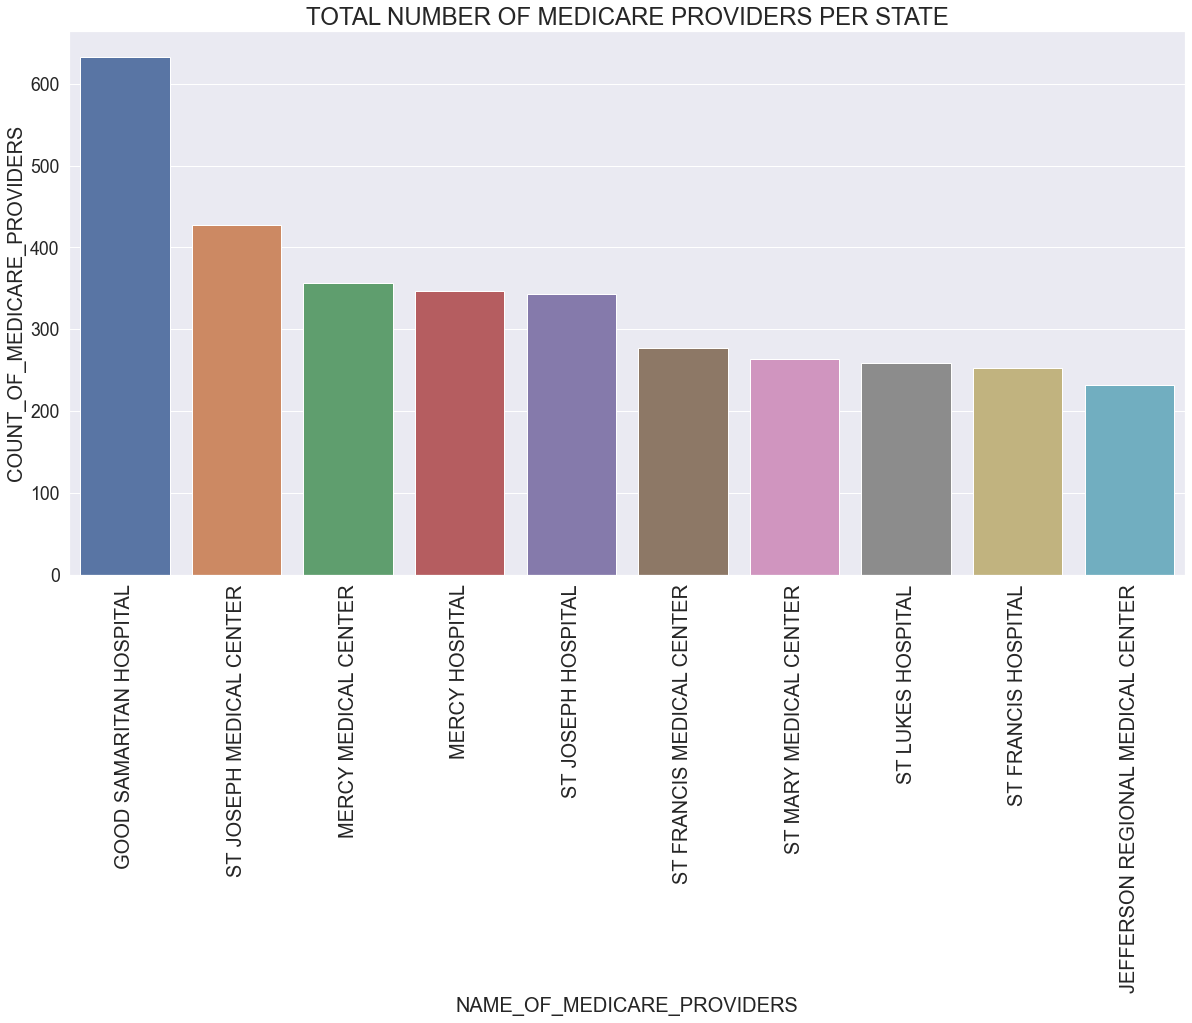

In [13]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df_new['Provider_Name'], data=df_new, order=df_new['Provider_Name'].value_counts().iloc[0:10].index)
plt.title('TOTAL NUMBER OF MEDICARE PROVIDERS PER STATE', fontsize=24)
plt.xticks(rotation=90, horizontalalignment="center",fontsize=20)
plt.xlabel('NAME_OF_MEDICARE_PROVIDERS', fontsize=20)
plt.ylabel('COUNT_OF_MEDICARE_PROVIDERS', fontsize=20)
plt.show()

In this we see that GOOD SAMARITAN HOSPITAL and ST JOSEPH MEDICAL CENTER both are the top medicare providers in state.Total number of medicare provided by GOOD SAMARITAN HOSPITAL is 633 and ST JOSEPH MEDICAL CENTER is 427.

## Top 10 avg medicare payments vs medicare provider

In [14]:
df_new.groupby("Provider_Name").Average_Medicare_Payments.sum().sort_values(ascending=False)

Provider_Name
GOOD SAMARITAN HOSPITAL            6191388.89
ST JOSEPH MEDICAL CENTER           3677009.08
MERCY MEDICAL CENTER               3056966.70
ST JOSEPH HOSPITAL                 2916049.81
MERCY HOSPITAL                     2739599.26
                                      ...    
HEALTHSOURCE SAGINAW                  2844.32
TURNING POINT HOSPITAL                2745.32
METHODIST WEST HOUSTON HOSPITAL       2743.57
WILMINGTON TREATMENT CENTER           2676.26
BRIGHTON HOSPITAL                     2610.40
Name: Average_Medicare_Payments, Length: 3201, dtype: float64

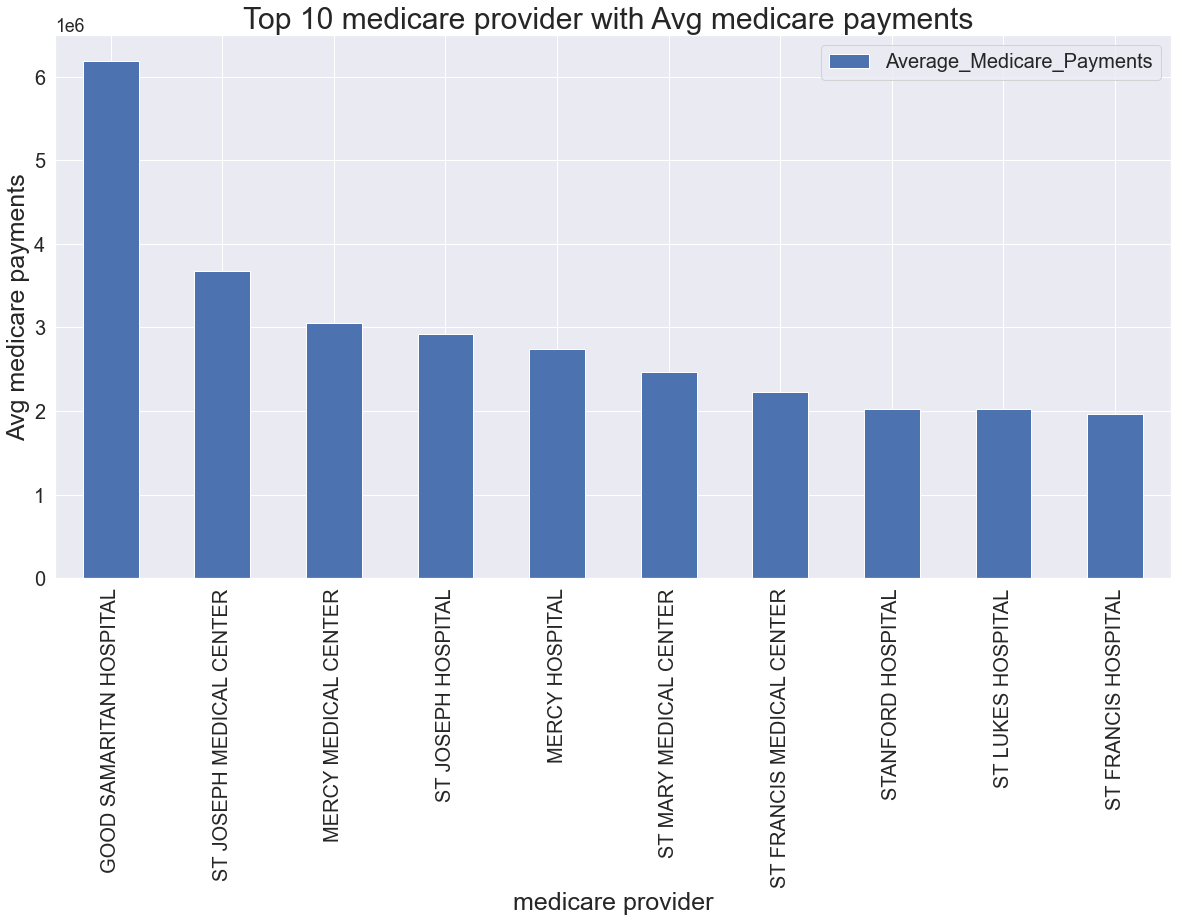

In [15]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)

df_new.groupby("Provider_Name").Average_Medicare_Payments.sum().sort_values(ascending=False)[:10].plot.bar()

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=90, horizontalalignment="center",fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 10 medicare provider with Avg medicare payments ",fontsize=30)
plt.xlabel("medicare provider",fontsize=25)
plt.ylabel("Avg medicare payments",fontsize=25)

plt.legend(prop={"size":20})

The bar graph shows that,Top 10 medicare provider with their Avg medicare payments.GOOD SAMARITAN HOSPITAL's Total medicare payment is  6191388.89 and ST JOSEPH MEDICAL CENTER's Total medicare payment is 3677009.08

## Total number of DRG defination

In [16]:
df.DRG_Definition.value_counts()

194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC    2899
                                                                            ... 
315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC                                859
473 - CERVICAL SPINAL FUSION W/O CC/MCC                                      846
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                               843
251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT W/O MCC                 727
885 - PSYCHOSES                                                              613
Name: DRG_Definition, Length: 100, dtype: int64

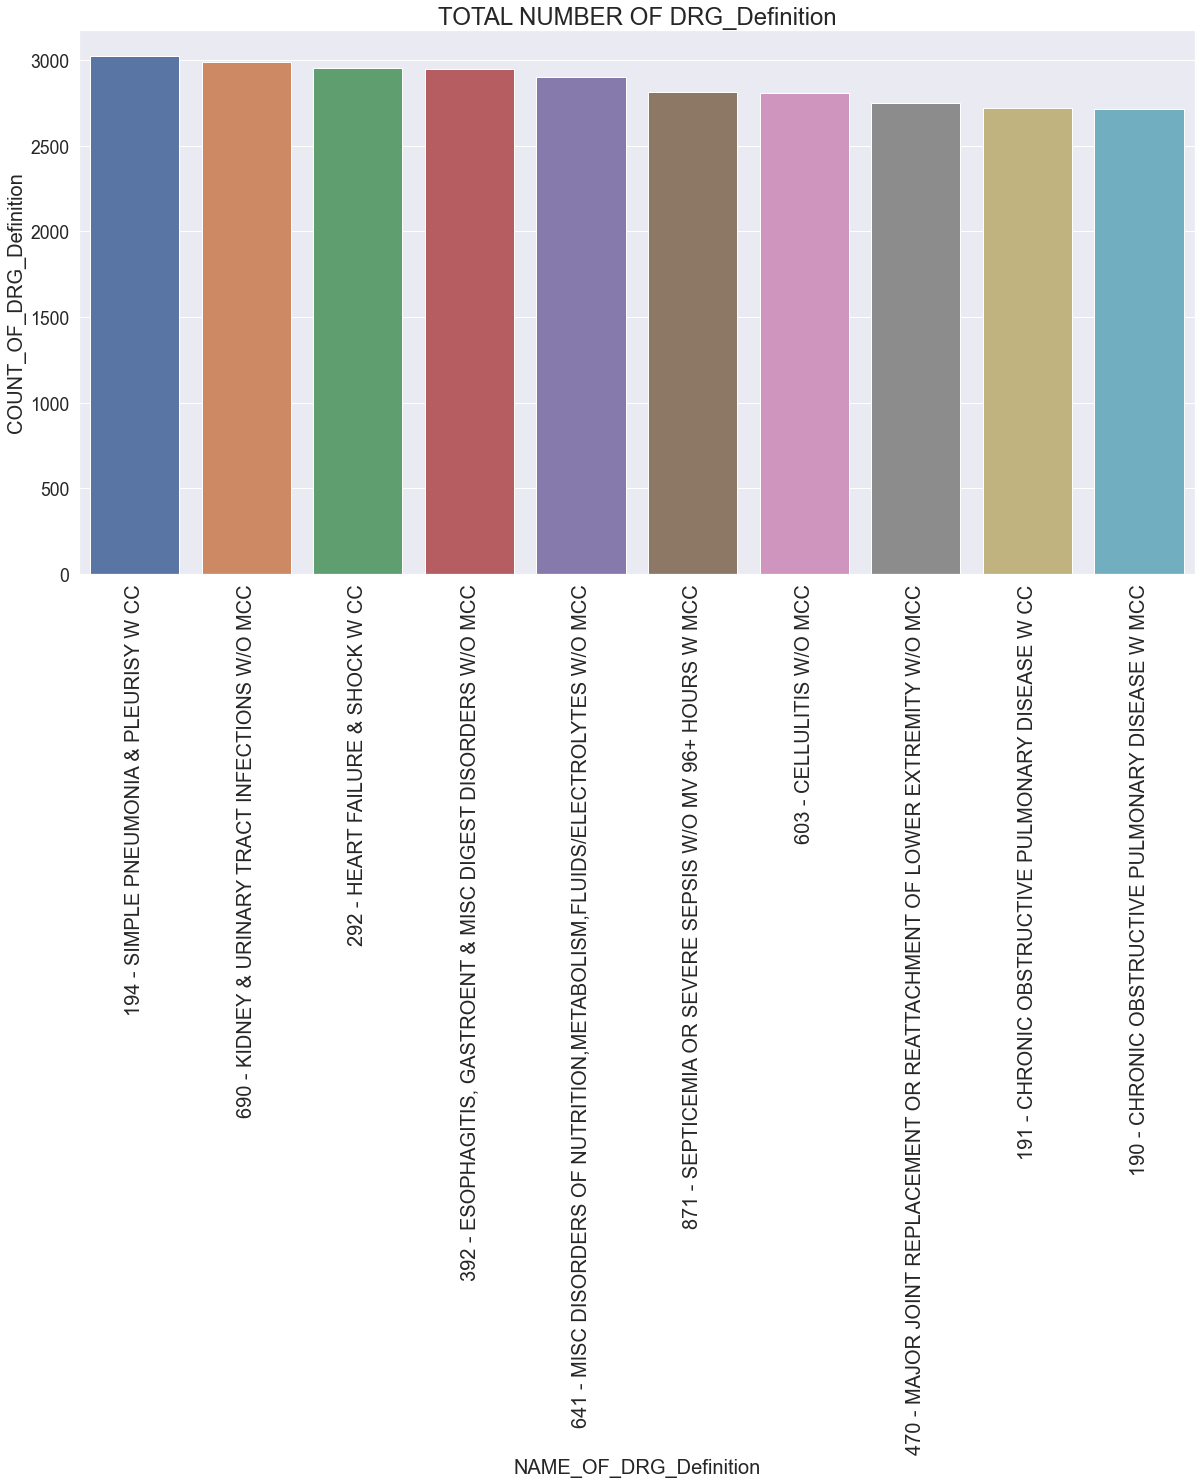

In [17]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df_new['DRG_Definition'], data=df_new, order=df_new['DRG_Definition'].value_counts().iloc[0:10].index)
plt.title('TOTAL NUMBER OF DRG_Definition', fontsize=24)
plt.xticks(rotation=90, horizontalalignment="center",fontsize=20)
plt.xlabel('NAME_OF_DRG_Definition', fontsize=20)
plt.ylabel('COUNT_OF_DRG_Definition', fontsize=20)

plt.show()

The above graph shows, Count of higest 10 DRG used for treatment.
1. 194 - SIMPLE PNEUMONIA & PLEURISY W CC  : 3023
2. 690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC : 2989

## Statewise no.of  medicare providers 

In [18]:
df_new.groupby("State").Provider_Name.value_counts().sort_values(ascending=False)
#df.Provider_Name.value_counts()

State  Provider_Name                         
OH     GOOD SAMARITAN HOSPITAL                   178
WA     ST JOSEPH MEDICAL CENTER                  176
CA     GOOD SAMARITAN HOSPITAL                   164
IL     ST MARYS HOSPITAL                         163
CA     ST JOSEPH HOSPITAL                        126
                                                ... 
PA     BUCKS COUNTY SPECIALTY HOSPITAL             1
       COORDINATED HEALTH ORTHOPEDIC HOSPITAL      1
       EAGLEVILLE HOSPITAL                         1
       EDGEWOOD SURGICAL HOSPITAL                  1
ID     TREASURE VALLEY HOSPITAL                    1
Name: Provider_Name, Length: 3325, dtype: int64

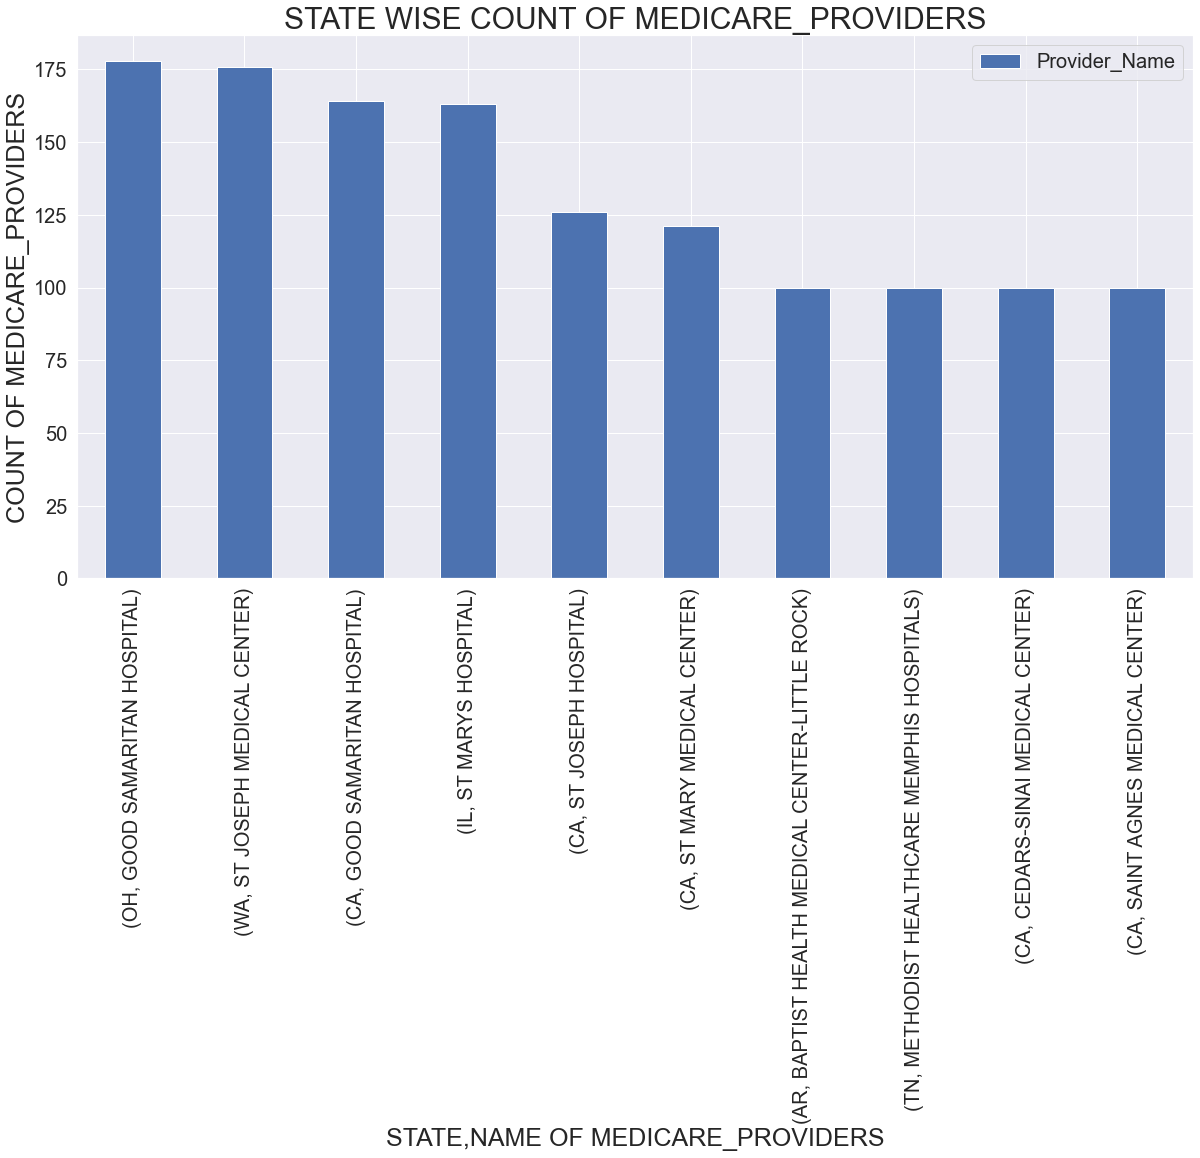

In [19]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)

df_new.groupby("State").Provider_Name.value_counts().sort_values(ascending=False)[:10].plot.bar()

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=90, horizontalalignment="center",fontsize=20)
plt.yticks(fontsize=20)
plt.title("STATE WISE COUNT OF MEDICARE_PROVIDERS",fontsize=30)
plt.xlabel("STATE,NAME OF MEDICARE_PROVIDERS",fontsize=25)
plt.ylabel("COUNT OF MEDICARE_PROVIDERS",fontsize=25)
plt.legend(prop={"size":20})

The above graph shows, count of Top 10 medicare provider name and state.
1. State : OH ,provider : GOOD SAMARITAN HOSPITAL  : 178
2. state : WA ,provider : ST JOSEPH MEDICAL CENTER : 176

## pie chart of  states wise Avg medicare payments

In [21]:
df_new.groupby("State").Average_Medicare_Payments.sum().sort_values(ascending=False).head()


State
CA    1.501626e+08
NY    9.747712e+07
TX    9.456119e+07
FL    8.553072e+07
IL    6.631920e+07
Name: Average_Medicare_Payments, dtype: float64

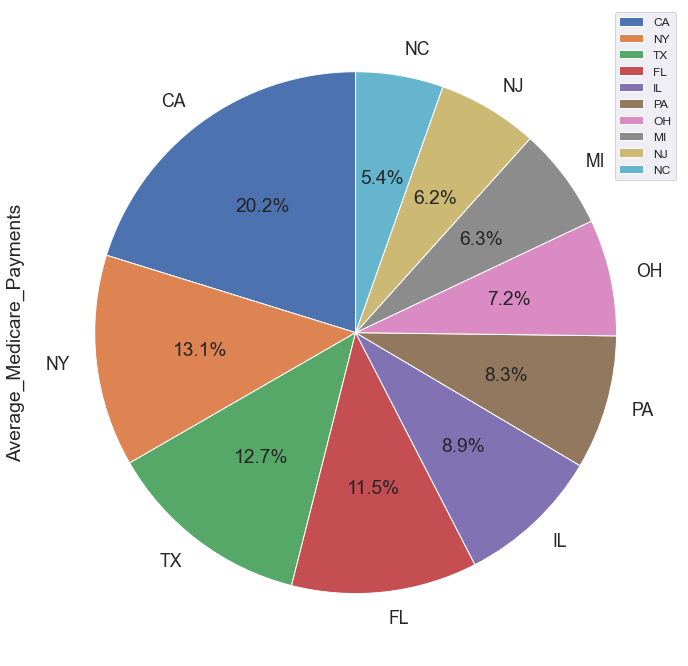

In [22]:
# Creating plot
df_new.groupby("State").Average_Medicare_Payments.sum().sort_values(ascending=False)[:10].plot(kind='pie',y='Average_Medicare_Payments', subplots=False, shadow = False,startangle=90,figsize=(22,12), autopct='%1.1f%%')
plt.legend(prop={"size":12})

The pie chart shows that, Top 10 states with their Avg medicare payments. 
Total medicare payment of state :
1. California (CA) : 20.2% 
2. New York (NY)   : 13.1%. 

## Bar chart : State wise Average Covered Charges 

In [23]:
df_new.groupby("State").Average_Covered_Charges.sum().sort_values(ascending=False).head(10)

State
CA    8.819326e+08
FL    5.133111e+08
TX    4.921210e+08
NJ    3.191226e+08
PA    3.093034e+08
NY    2.885167e+08
IL    2.852132e+08
OH    1.987497e+08
GA    1.544896e+08
MI    1.307293e+08
Name: Average_Covered_Charges, dtype: float64

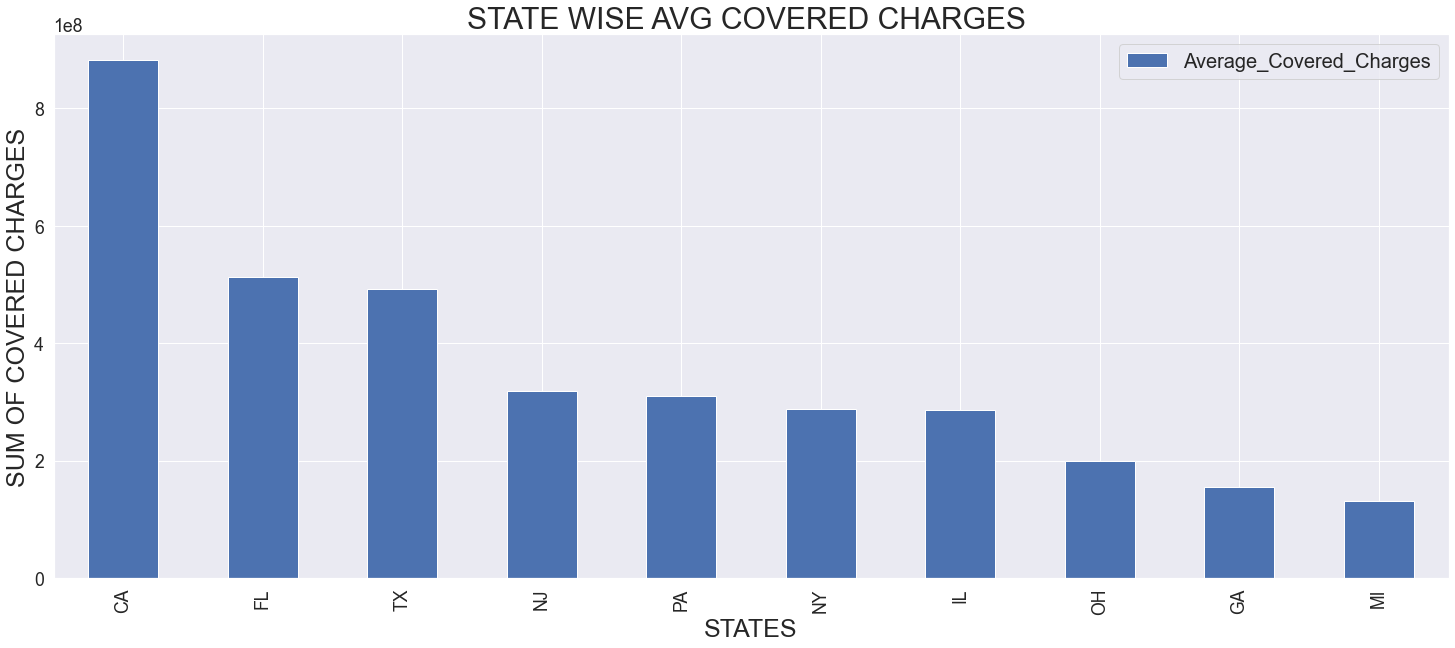

In [24]:
# Creating plot
df_new.groupby("State").Average_Covered_Charges.sum().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(25,10))

plt.title("STATE WISE AVG COVERED CHARGES ",fontsize=30)
plt.xlabel("STATES",fontsize=25)
plt.ylabel("SUM OF COVERED CHARGES",fontsize=25)

plt.legend(prop={"size":20})

The bar graph shows that,Top 10 States with their Avg Covered charges.
Average coverd charges:
1. California (CA) : 8.819326e+08
2. Florida (FL)    : 5.133111e+08

## Bar graph : states wise number of Insured Males and females 

In [25]:
print(df_new.groupby("State").Insured_Males_18to25.sum().sort_values(ascending=False).head(10))

print(df_new.groupby("State").Females_18to25_with_Insurance.sum().sort_values(ascending=False).head(10))

State
CA    1.904880e+10
TX    1.006073e+10
NY    7.493828e+09
FL    6.475355e+09
PA    4.020301e+09
IL    3.814408e+09
OH    3.112830e+09
MI    2.184832e+09
NC    1.733948e+09
GA    1.650479e+09
Name: Insured_Males_18to25, dtype: float64
State
CA    1.975006e+10
TX    1.048358e+10
NY    7.922119e+09
FL    6.970525e+09
PA    4.202992e+09
IL    4.076520e+09
OH    3.296348e+09
MI    2.273525e+09
NC    1.868936e+09
GA    1.813752e+09
Name: Females_18to25_with_Insurance, dtype: float64


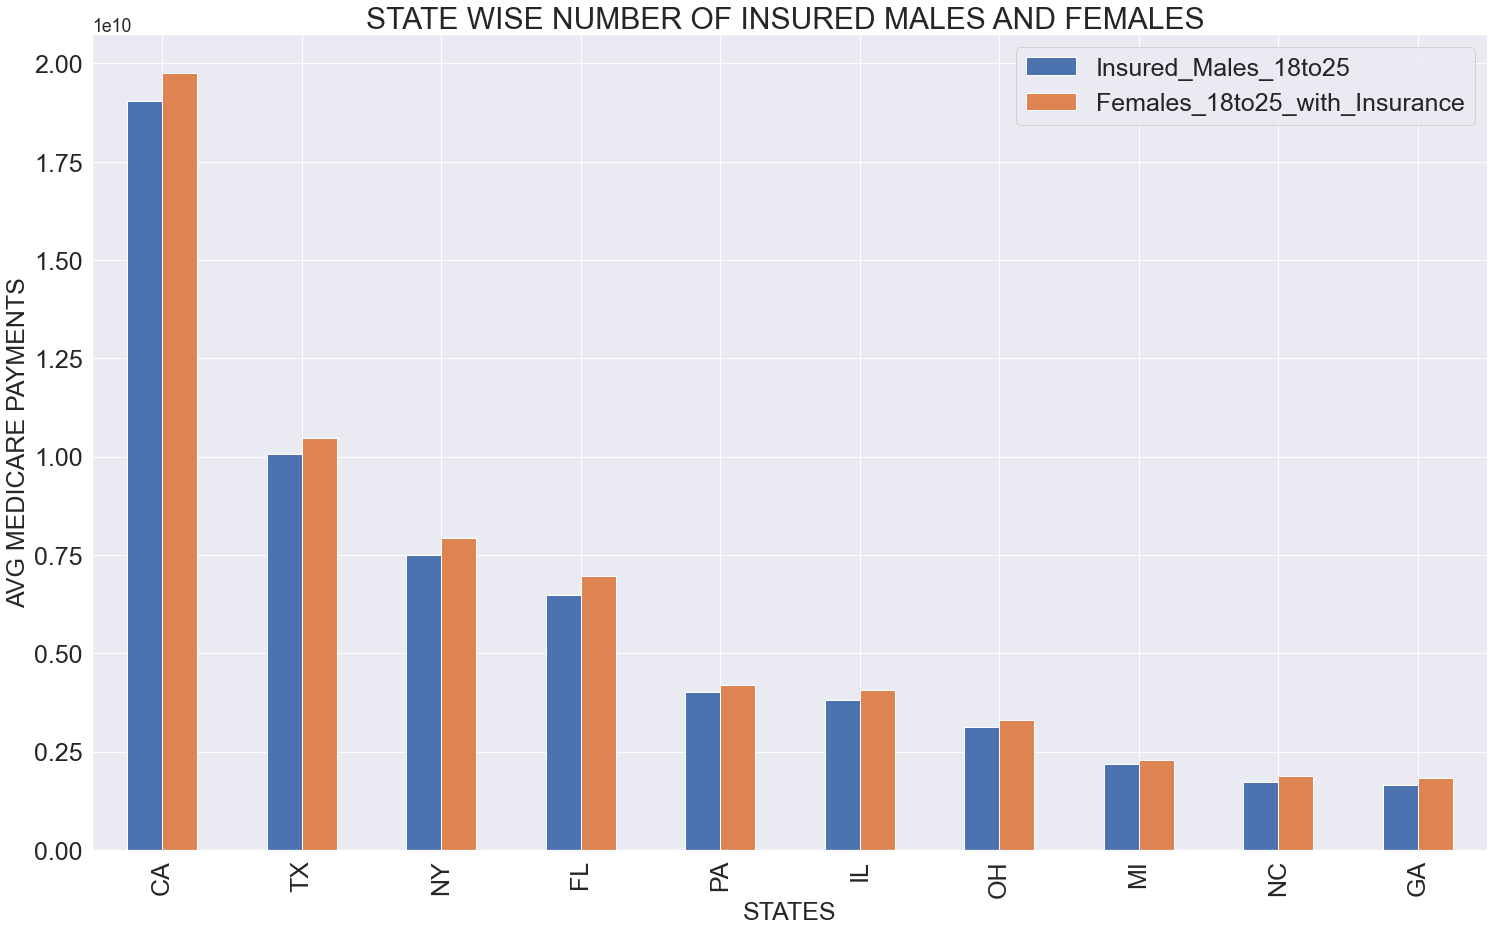

In [26]:

df_new.groupby('State').sum().sort_values("Insured_Males_18to25",ascending=False)[:10].plot(y=["Insured_Males_18to25", "Females_18to25_with_Insurance"],kind='bar',figsize=(25,15),fontsize=20)

plt.title("STATE WISE NUMBER OF INSURED MALES AND FEMALES ",fontsize=30)
plt.xlabel("STATES",fontsize=25)
plt.ylabel("AVG MEDICARE PAYMENTS",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(prop={"size":25})

The bar graph shows, California (CA) state is having highest number of insured males and females than other states, but in that all states have number of insured females are more than  males.

## scatter plot of Insured and Non Insured  Males Age between 18to25

<AxesSubplot:xlabel='Insured_Males_18to25', ylabel='Noninsured_Males_18to25'>

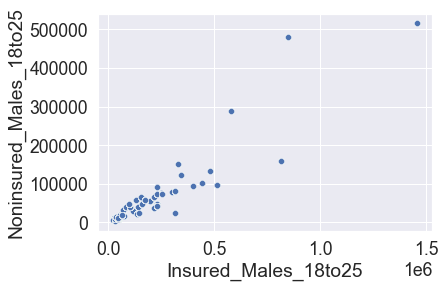

In [27]:
sns.scatterplot(x='Insured_Males_18to25', y='Noninsured_Males_18to25', data=df_new)

# Histogram 

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

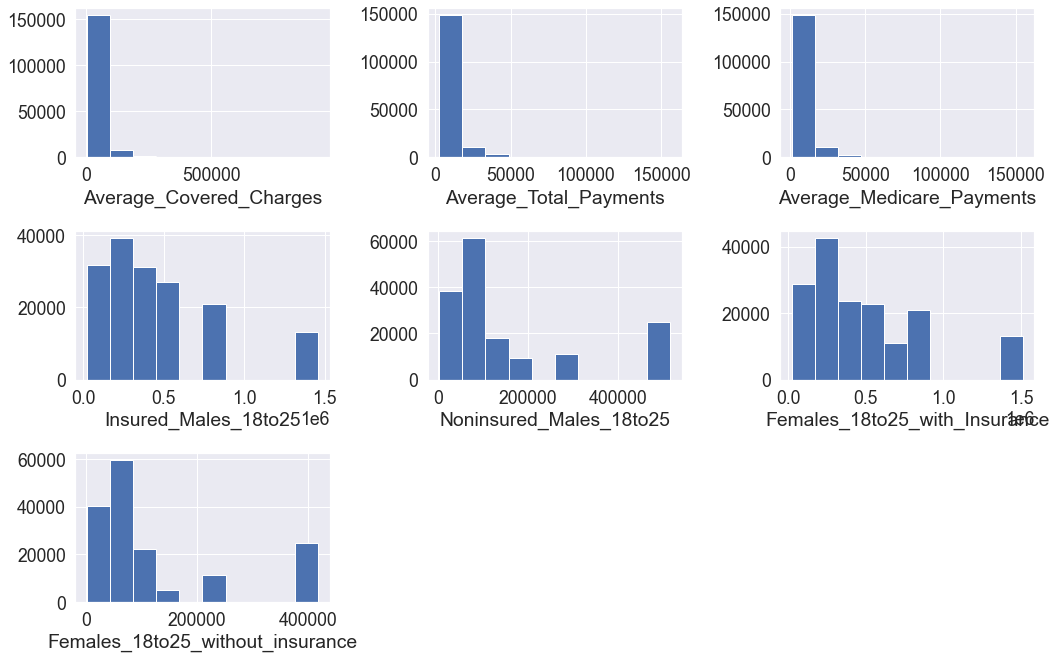

In [28]:
col=['Average_Covered_Charges','Average_Total_Payments','Average_Medicare_Payments','Insured_Males_18to25','Noninsured_Males_18to25',
     'Females_18to25_with_Insurance','Females_18to25_without_insurance']

plt.figure(figsize=(15, 15))

for i, col in enumerate(df_new[col],1):
    plt.subplot(5,3,i)
    df_new[col].hist()
    plt.xlabel(col)
plt.tight_layout()